<div align="center">

# MLOps Zoomcamp HW1

</div>


In [1]:
pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 

### Data Extraction

In [3]:
df = pd.read_parquet('./data/yellow_tripdata_2022-01.parquet')
df_val = pd.read_parquet('./data/yellow_tripdata_2022-02.parquet')

In [4]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.50,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.00,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.50,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.00,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.50,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32,NaN,None,90,170,0,8.00,0.0,0.5,2.39,0.0,0.3,13.69,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19,NaN,None,107,75,0,16.80,0.0,0.5,4.35,0.0,0.3,24.45,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10,NaN,None,113,246,0,11.22,0.0,0.5,2.00,0.0,0.3,16.52,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92,NaN,None,148,164,0,12.40,0.0,0.5,0.00,0.0,0.3,15.70,NaN,NaN


In [5]:
# QUESTION 1 - HOW MANY COLUMNS IN DF?
column_number = df.shape[1]
total_row_original = df.shape[0]
column_number

19

In [6]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

### Calculating Duration

In [7]:
# Duration calculation in minutes
df['duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime)/np.timedelta64(1,'m')
df_val['duration'] = (df_val.tpep_dropoff_datetime - df_val.tpep_pickup_datetime)/np.timedelta64(1,'m')

In [8]:
# QUESTION 2 - STD OF Duration in January
df.duration.describe()

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_6893/3426635498.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration)


<Axes: xlabel='duration', ylabel='Density'>

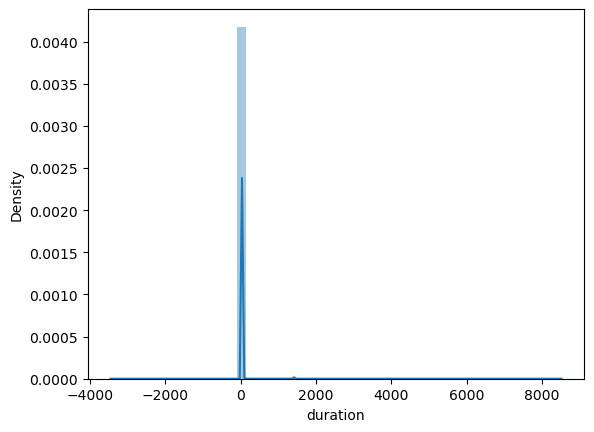

In [10]:
sns.distplot(df.duration)

In [11]:
# Duration cannot be negative or zero
df = df[df['tpep_dropoff_datetime'] > df['tpep_pickup_datetime']]

/tmp/ipykernel_6893/3164066024.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.duration.sample(10000))


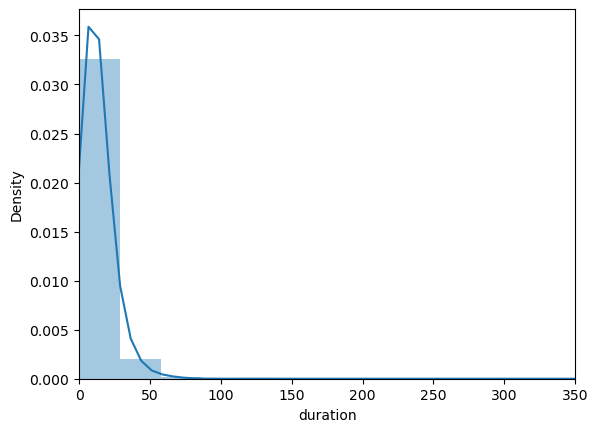

In [12]:
sns.distplot(df.duration.sample(10000))
plt.xlim(0,350)
plt.show()

In [13]:
df.duration.describe(percentiles = [0.01, 0.05, 0.10, 0.9, 0.95, 0.99 ])

count    2.461482e+06
mean     1.422798e+01
std      4.641384e+01
min      1.666667e-02
1%       7.666667e-01
5%       2.983333e+00
10%      4.033333e+00
50%      1.018333e+01
90%      2.465000e+01
95%      3.195000e+01
99%      5.085000e+01
max      8.513183e+03
Name: duration, dtype: float64

In [14]:
# QUESTION 3 - FRACTION OF DURATIONS BETWEEN 1 AND 60 MINUTES
(df[(df.duration>=1) & (df.duration<=60)].shape[0] / total_row_original)* 100

98.27547930522405

### Dropping outliers

In [15]:
df = df[(df.duration>=1) & (df.duration<=60)].copy()
df_val = df[(df_val.duration>=1) & (df_val.duration<=60)].copy()

/tmp/ipykernel_6893/639906156.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_val = df[(df_val.duration>=1) & (df_val.duration<=60)].copy()


### ONE HOT ENCODING

In [16]:
from sklearn.feature_extraction import DictVectorizer

In [17]:
categorical_features = ['PULocationID', 'DOLocationID']
df[categorical_features] = df[categorical_features].astype(str)
train_dict = df[categorical_features].to_dict(orient='records')

df_val[categorical_features] = df_val[categorical_features].astype(str)
val_dict = df_val[categorical_features].to_dict(orient='records')



In [18]:
# QUESTION 4 - What is the dimensionality of this one hot encoded matrix?
dv = DictVectorizer()
X_train = dv.fit_transform(train_dict)
X_val = dv.transform(val_dict)

X_train.shape

(2421440, 515)

In [19]:
y_train = df['duration']
y_val = df_val['duration']

### Training

In [20]:
pip install numpy scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
import time
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [22]:
# Question 5 -6 : Validation and Training RMSE of Linear Regression Model
# Linear Regression
start_time = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_time = time.time() - start_time
lin_reg_train_pred = lin_reg.predict(X_train)
lin_reg_val_pred = lin_reg.predict(X_val)
lin_reg_train_rmse = np.sqrt(mean_squared_error(y_train, lin_reg_train_pred))
lin_reg_val_rmse = np.sqrt(mean_squared_error(y_val, lin_reg_val_pred))
print(f"Linear Regression - Training Time: {lin_reg_time:.4f}s, Train RMSE: {lin_reg_train_rmse:.4f}, Val RMSE: {lin_reg_val_rmse:.4f}")

# Lasso Regression
start_time = time.time()
lasso_reg = Lasso(alpha=0.1) 
lasso_reg.fit(X_train, y_train)
lasso_reg_time = time.time() - start_time
lasso_reg_train_pred = lasso_reg.predict(X_train)
lasso_reg_val_pred = lasso_reg.predict(X_val)
lasso_reg_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_reg_train_pred))
lasso_reg_val_rmse = np.sqrt(mean_squared_error(y_val, lasso_reg_val_pred))
print(f"Lasso Regression - Training Time: {lasso_reg_time:.4f}s, Train RMSE: {lasso_reg_train_rmse:.4f}, Val RMSE: {lasso_reg_val_rmse:.4f}")

# Ridge Regression
start_time = time.time()
ridge_reg = Ridge(alpha=0.1)  
ridge_reg.fit(X_train, y_train)
ridge_reg_time = time.time() - start_time
ridge_reg_train_pred = ridge_reg.predict(X_train)
ridge_reg_val_pred = ridge_reg.predict(X_val)
ridge_reg_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_reg_train_pred))
ridge_reg_val_rmse = np.sqrt(mean_squared_error(y_val, ridge_reg_val_pred))
print(f"Ridge Regression - Training Time: {ridge_reg_time:.4f}s, Train RMSE: {ridge_reg_train_rmse:.4f}, Val RMSE: {ridge_reg_val_rmse:.4f}")

# XGBoost Regression
start_time = time.time()
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_reg_time = time.time() - start_time
xgb_reg_train_pred = xgb_reg.predict(X_train)
xgb_reg_val_pred = xgb_reg.predict(X_val)
xgb_reg_train_rmse = np.sqrt(mean_squared_error(y_train, xgb_reg_train_pred))
xgb_reg_val_rmse = np.sqrt(mean_squared_error(y_val, xgb_reg_val_pred))
print(f"XGBoost Regression - Training Time: {xgb_reg_time:.4f}s, Train RMSE: {xgb_reg_train_rmse:.4f}, Val RMSE: {xgb_reg_val_rmse:.4f}")

Linear Regression - Training Time: 17.5332s, Train RMSE: 6.9862, Val RMSE: 6.9857
Lasso Regression - Training Time: 7.9907s, Train RMSE: 7.9368, Val RMSE: 7.9364
Ridge Regression - Training Time: 7.8329s, Train RMSE: 6.9862, Val RMSE: 6.9858
XGBoost Regression - Training Time: 29.1545s, Train RMSE: 6.4080, Val RMSE: 6.4076


In [23]:
# Lasso Regression
start_time = time.time()
lasso_reg = Lasso(alpha=0.01) 
lasso_reg.fit(X_train, y_train)
lasso_reg_time = time.time() - start_time
lasso_reg_train_pred = lasso_reg.predict(X_train)
lasso_reg_val_pred = lasso_reg.predict(X_val)
lasso_reg_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_reg_train_pred))
lasso_reg_val_rmse = np.sqrt(mean_squared_error(y_val, lasso_reg_val_pred))
print(f"Lasso Regression - Training Time: {lasso_reg_time:.4f}s, Train RMSE: {lasso_reg_train_rmse:.4f}, Val RMSE: {lasso_reg_val_rmse:.4f}")

# Ridge Regression
start_time = time.time()
ridge_reg = Ridge(alpha=0.01)  
ridge_reg.fit(X_train, y_train)
ridge_reg_time = time.time() - start_time
ridge_reg_train_pred = ridge_reg.predict(X_train)
ridge_reg_val_pred = ridge_reg.predict(X_val)
ridge_reg_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_reg_train_pred))
ridge_reg_val_rmse = np.sqrt(mean_squared_error(y_val, ridge_reg_val_pred))
print(f"Ridge Regression - Training Time: {ridge_reg_time:.4f}s, Train RMSE: {ridge_reg_train_rmse:.4f}, Val RMSE: {ridge_reg_val_rmse:.4f}")

# Lasso Regression
start_time = time.time()
lasso_reg = Lasso(alpha=0.001) 
lasso_reg.fit(X_train, y_train)
lasso_reg_time = time.time() - start_time
lasso_reg_train_pred = lasso_reg.predict(X_train)
lasso_reg_val_pred = lasso_reg.predict(X_val)
lasso_reg_train_rmse = np.sqrt(mean_squared_error(y_train, lasso_reg_train_pred))
lasso_reg_val_rmse = np.sqrt(mean_squared_error(y_val, lasso_reg_val_pred))
print(f"Lasso Regression - Training Time: {lasso_reg_time:.4f}s, Train RMSE: {lasso_reg_train_rmse:.4f}, Val RMSE: {lasso_reg_val_rmse:.4f}")

# Ridge Regression
start_time = time.time()
ridge_reg = Ridge(alpha=0.001)  
ridge_reg.fit(X_train, y_train)
ridge_reg_time = time.time() - start_time
ridge_reg_train_pred = ridge_reg.predict(X_train)
ridge_reg_val_pred = ridge_reg.predict(X_val)
ridge_reg_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_reg_train_pred))
ridge_reg_val_rmse = np.sqrt(mean_squared_error(y_val, ridge_reg_val_pred))
print(f"Ridge Regression - Training Time: {ridge_reg_time:.4f}s, Train RMSE: {ridge_reg_train_rmse:.4f}, Val RMSE: {ridge_reg_val_rmse:.4f}")



Lasso Regression - Training Time: 34.2595s, Train RMSE: 7.3303, Val RMSE: 7.3303
Ridge Regression - Training Time: 7.6710s, Train RMSE: 6.9862, Val RMSE: 6.9858
Lasso Regression - Training Time: 298.6699s, Train RMSE: 7.0564, Val RMSE: 7.0561
Ridge Regression - Training Time: 8.0191s, Train RMSE: 6.9862, Val RMSE: 6.9858
